In [1]:
import math
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
import seaborn as sns
from backend import *
from cycler import cycler
from labellines import labelLine, labelLines

In [2]:
plt.rcParams['font.size'] = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])

[Text(2.5468302525850413, 1.6787410047022375, '35mm'),
 Text(6.33869711256927, 0.9616190386362308, 'APS-C'),
 Text(15.776112696993492, 0.2347171459769692, '4/3'),
 Text(39.26449353995999, 0.02351873521375671, '1"')]

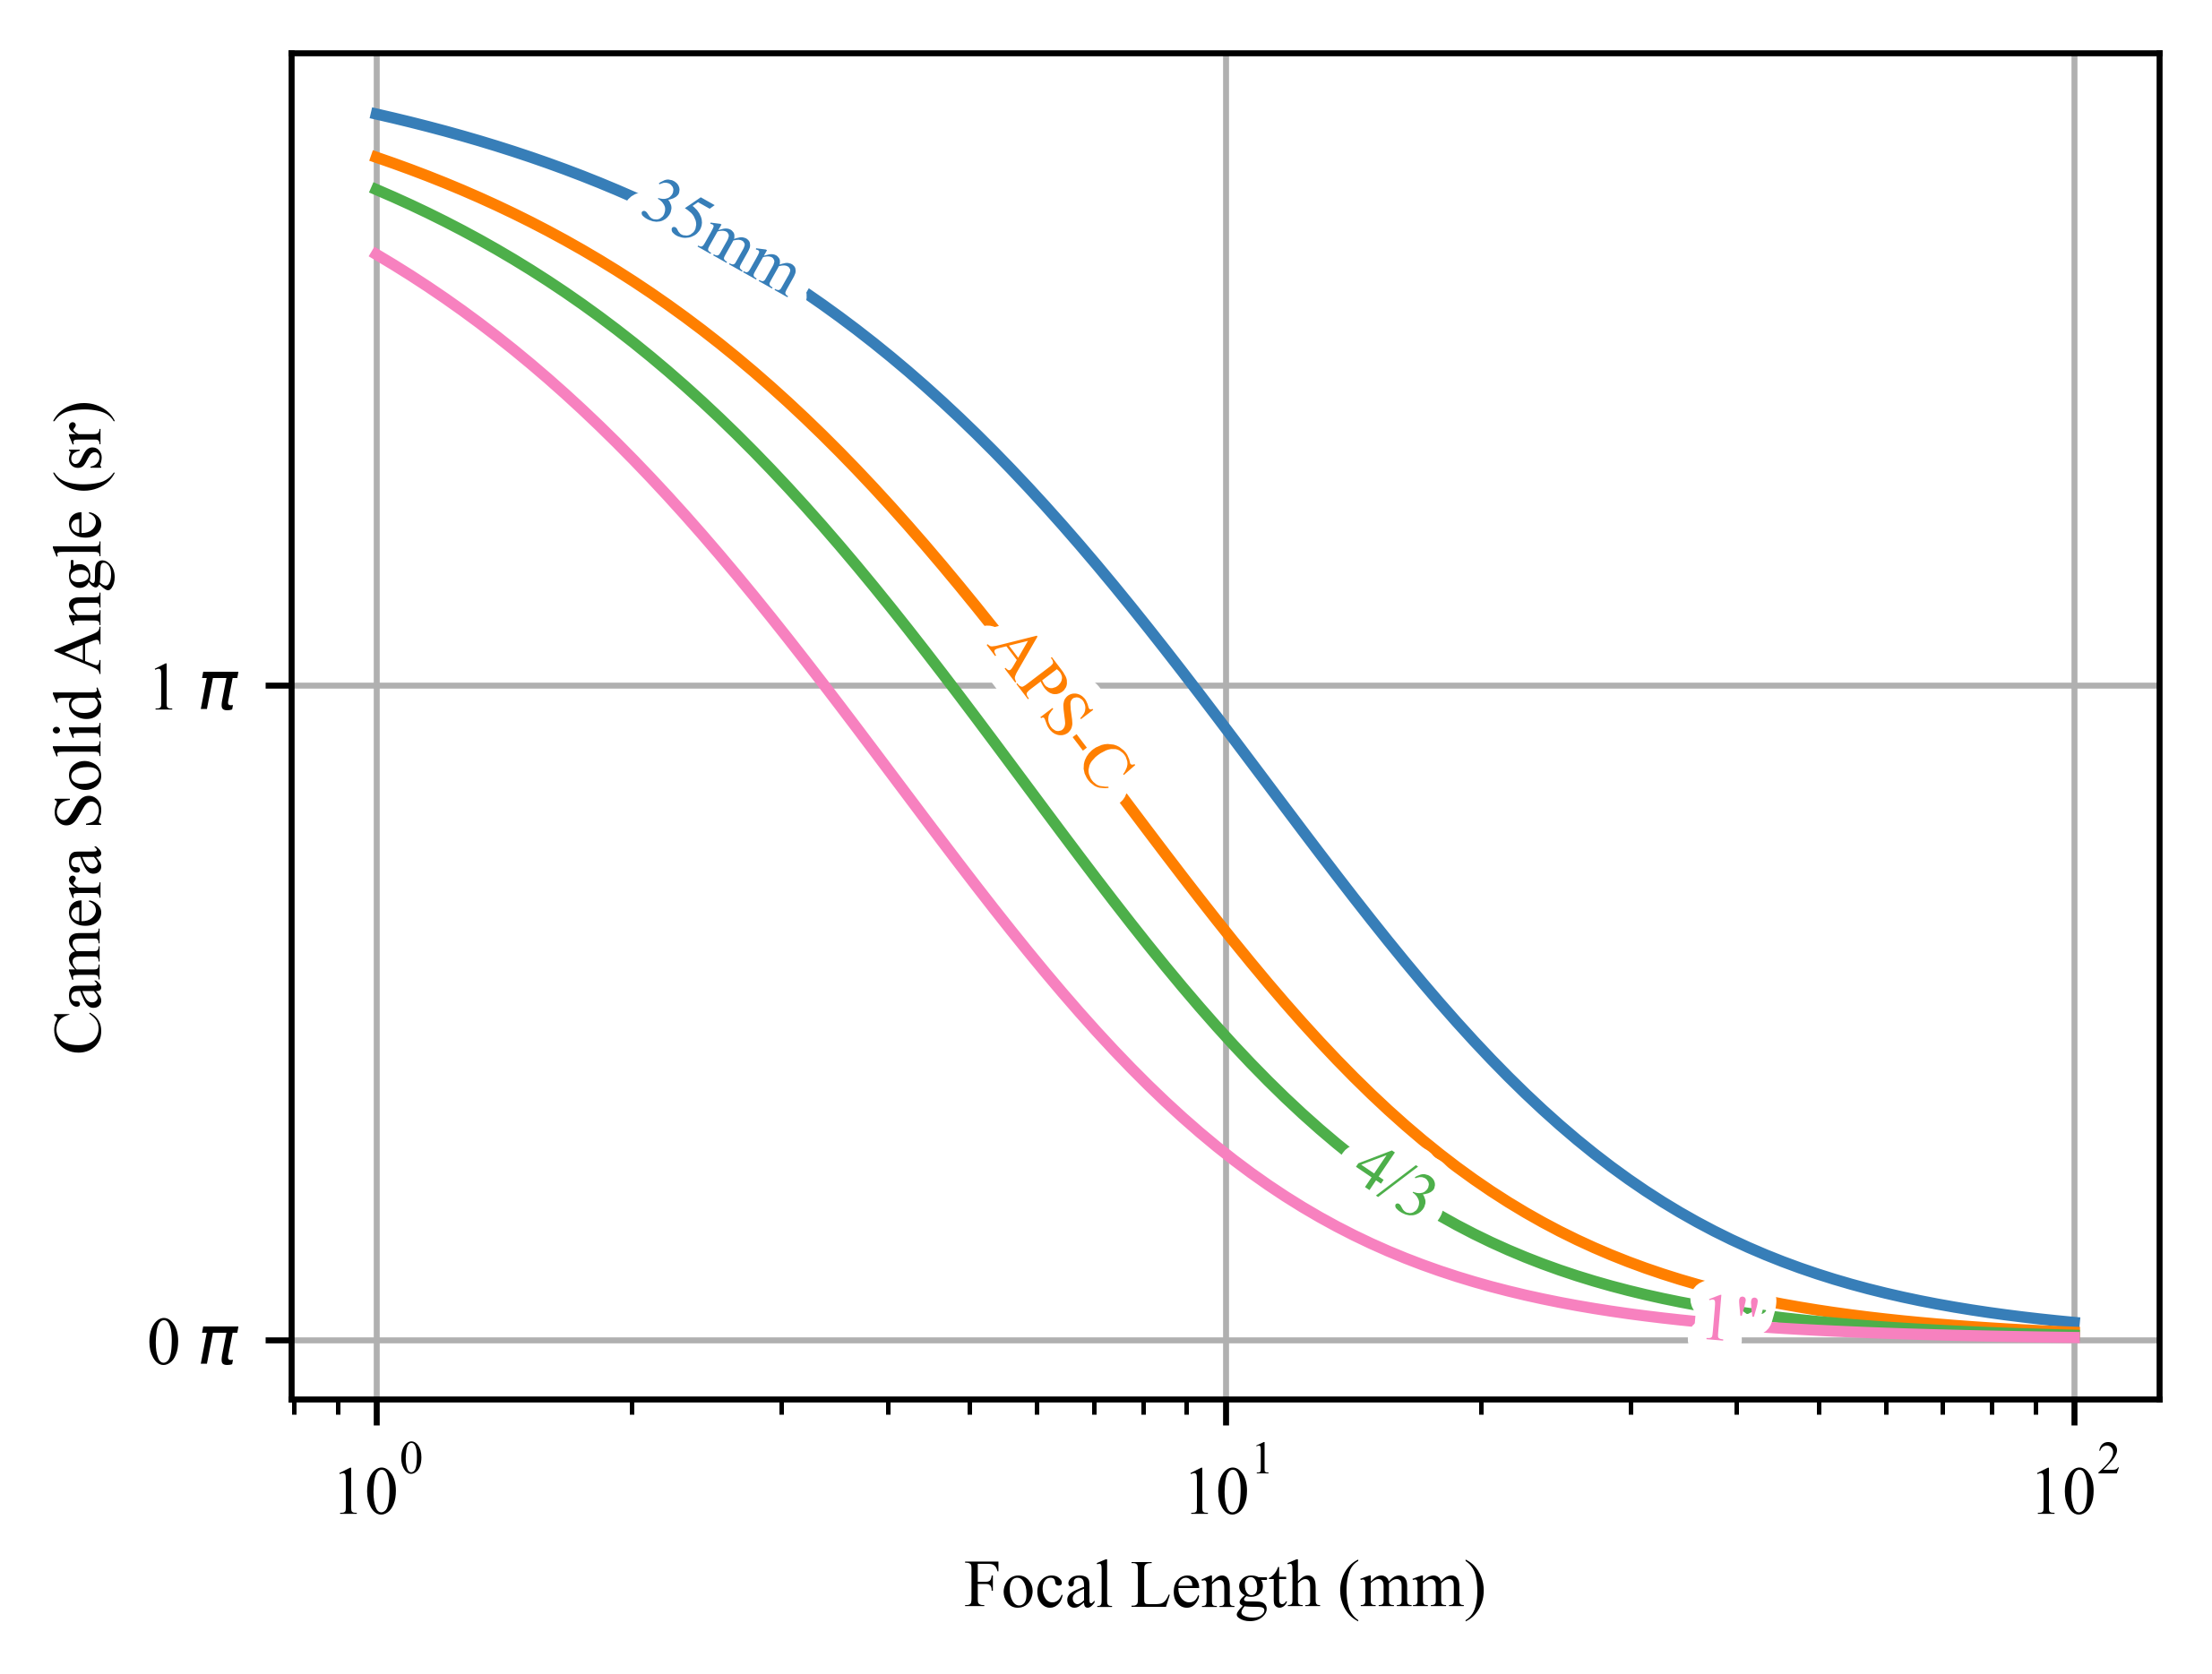

In [3]:
f_c = np.logspace(-3, -1, 100)
sizes = {
    '35mm': (35.9e-3, 23.9e-3),
    'APS-C': (23.6e-3, 15.7e-3),
    '4/3': (17.3e-3, 13e-3),
    '1"': (13.2e-3, 8.8e-3)
}
Omega_c = {}
for size, params in sizes.items():
    w_c = params[0]
    h_c = params[1]
    Omega_c[size] = solid_camera_angle(w_c, h_c, f_c)

fig = plt.figure(layout='compressed')
ax = fig.add_subplot(111)
[ax.plot(f_c * 1e3, Omega_c[size] / np.pi, label=size) for size in sizes]
ax.grid()
ax.set_xlabel('Focal Length (mm)')
ax.set_ylabel('Camera Solid Angle (sr)')
ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.yaxis.set_major_locator(tck.MultipleLocator(base=1.0))
ax.semilogx()
# ax.legend(title='Sensor Size')
labelLines(ax.get_lines())

[]

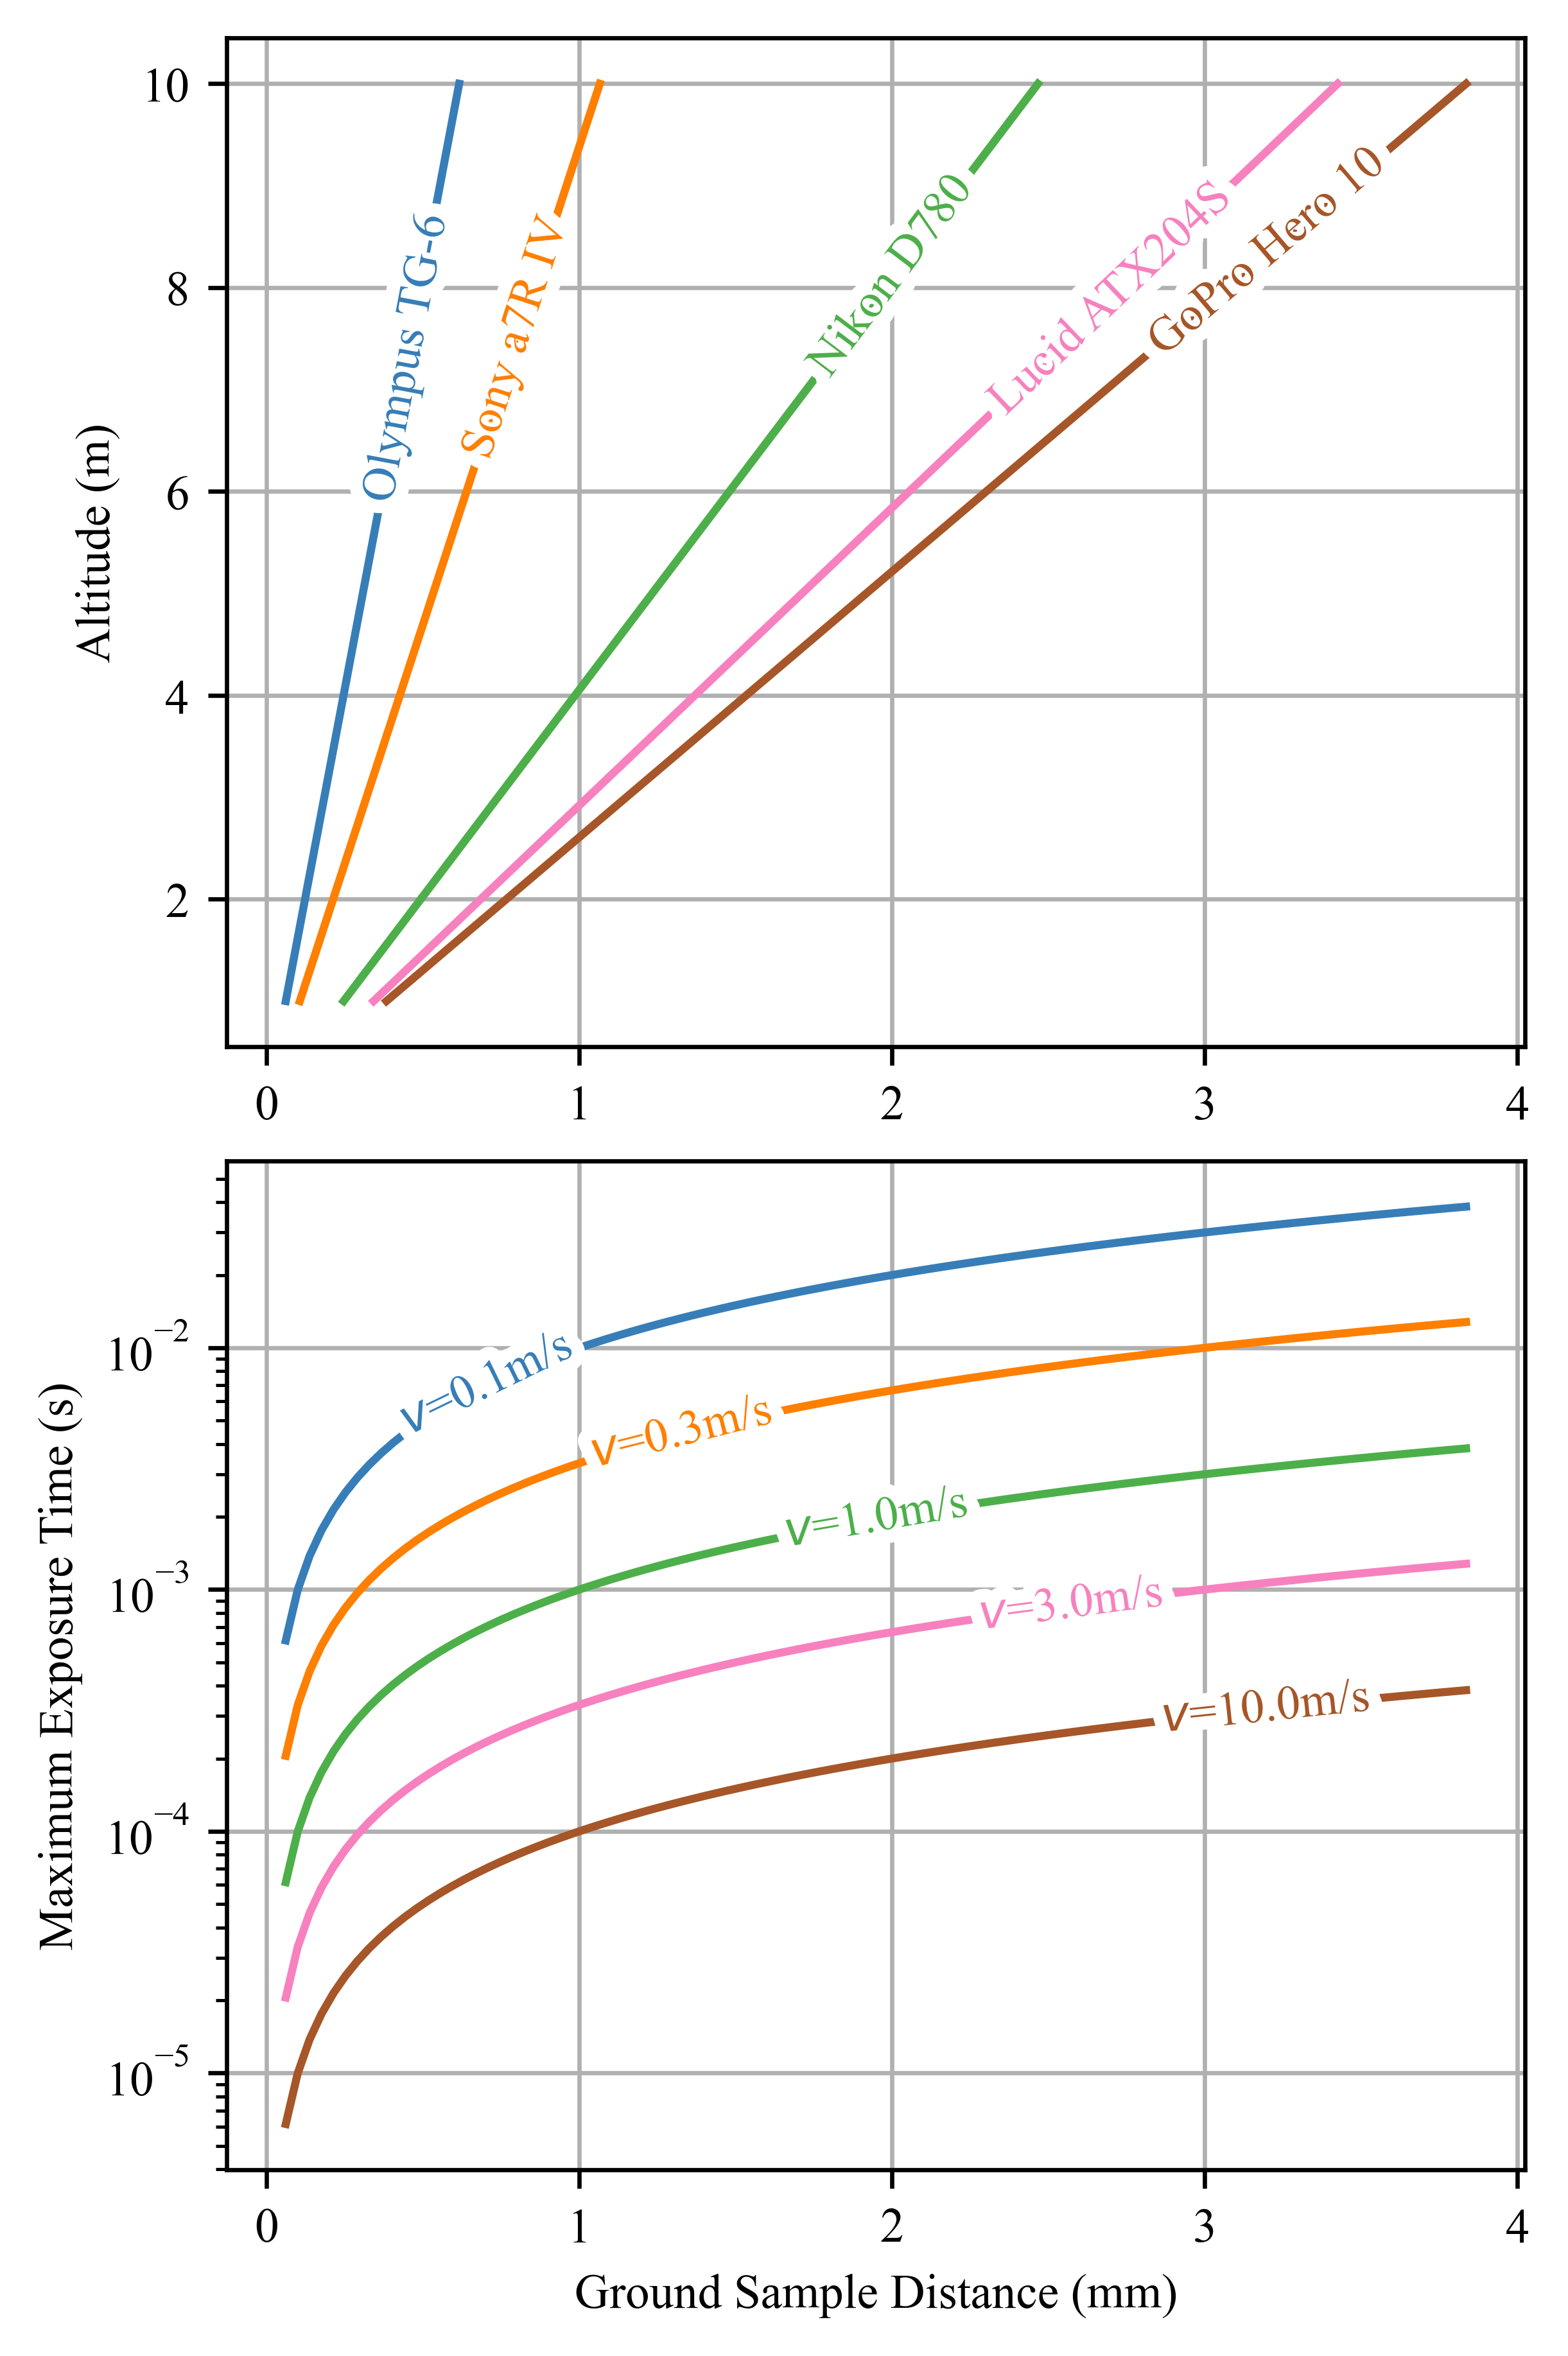

In [4]:
altitudes_m = np.linspace(1, 10, 100)
cameras = {
    # focal length, pixel pitch
    (25e-3, 1.54e-6): 'Olympus TG-6',
    (35e-3, 3.73e-6): 'Sony a7R IV',
    (24e-3, 5.92e-6): 'Nikon D780',
    (8e-3, 2.74e-6): 'Lucid ATX204S',
    (2.92e-3, 1.12e-6): 'GoPro Hero 10',
}

fig = plt.figure(layout='compressed', figsize=(4,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)
pixel_size = []
for camera, name in cameras.items():
    projected_pixel_size = camera[1] * altitudes_m / camera[0]
    ax1.plot(projected_pixel_size * 1e3, altitudes_m, label=name)
    pixel_size.append(projected_pixel_size)

pixel_size = np.array(pixel_size)
pixel_sizes = np.linspace(pixel_size.min(), pixel_size.max(), 100)
vels_mps = np.array([0.1, 0.3, 1, 3, 10])
for vel in vels_mps:
    max_shutter_speed = pixel_sizes / vel
    ax2.plot(pixel_sizes * 1e3, max_shutter_speed, label=f'$v$={vel}m/s')

ax1.grid()
ax1.set_ylabel('Altitude (m)')
# ax1.legend(title='$f_c$ (mm), $p_c$ (um)')
labelLines(ax1.get_lines(), xvals=[
    0.00045 * 1e3,
    0.0008 * 1e3,
    0.0020 * 1e3,
    0.0027 * 1e3,
    0.0032 * 1e3
])
labelLines(ax2.get_lines())
ax2.set_xlabel('Ground Sample Distance (mm)')
ax2.grid()
ax2.set_ylabel('Maximum Exposure Time (s)')
ax2.semilogy()

In [5]:
sv_fsl_df = pd.read_csv('fs_stereo_fish_length_data.csv')

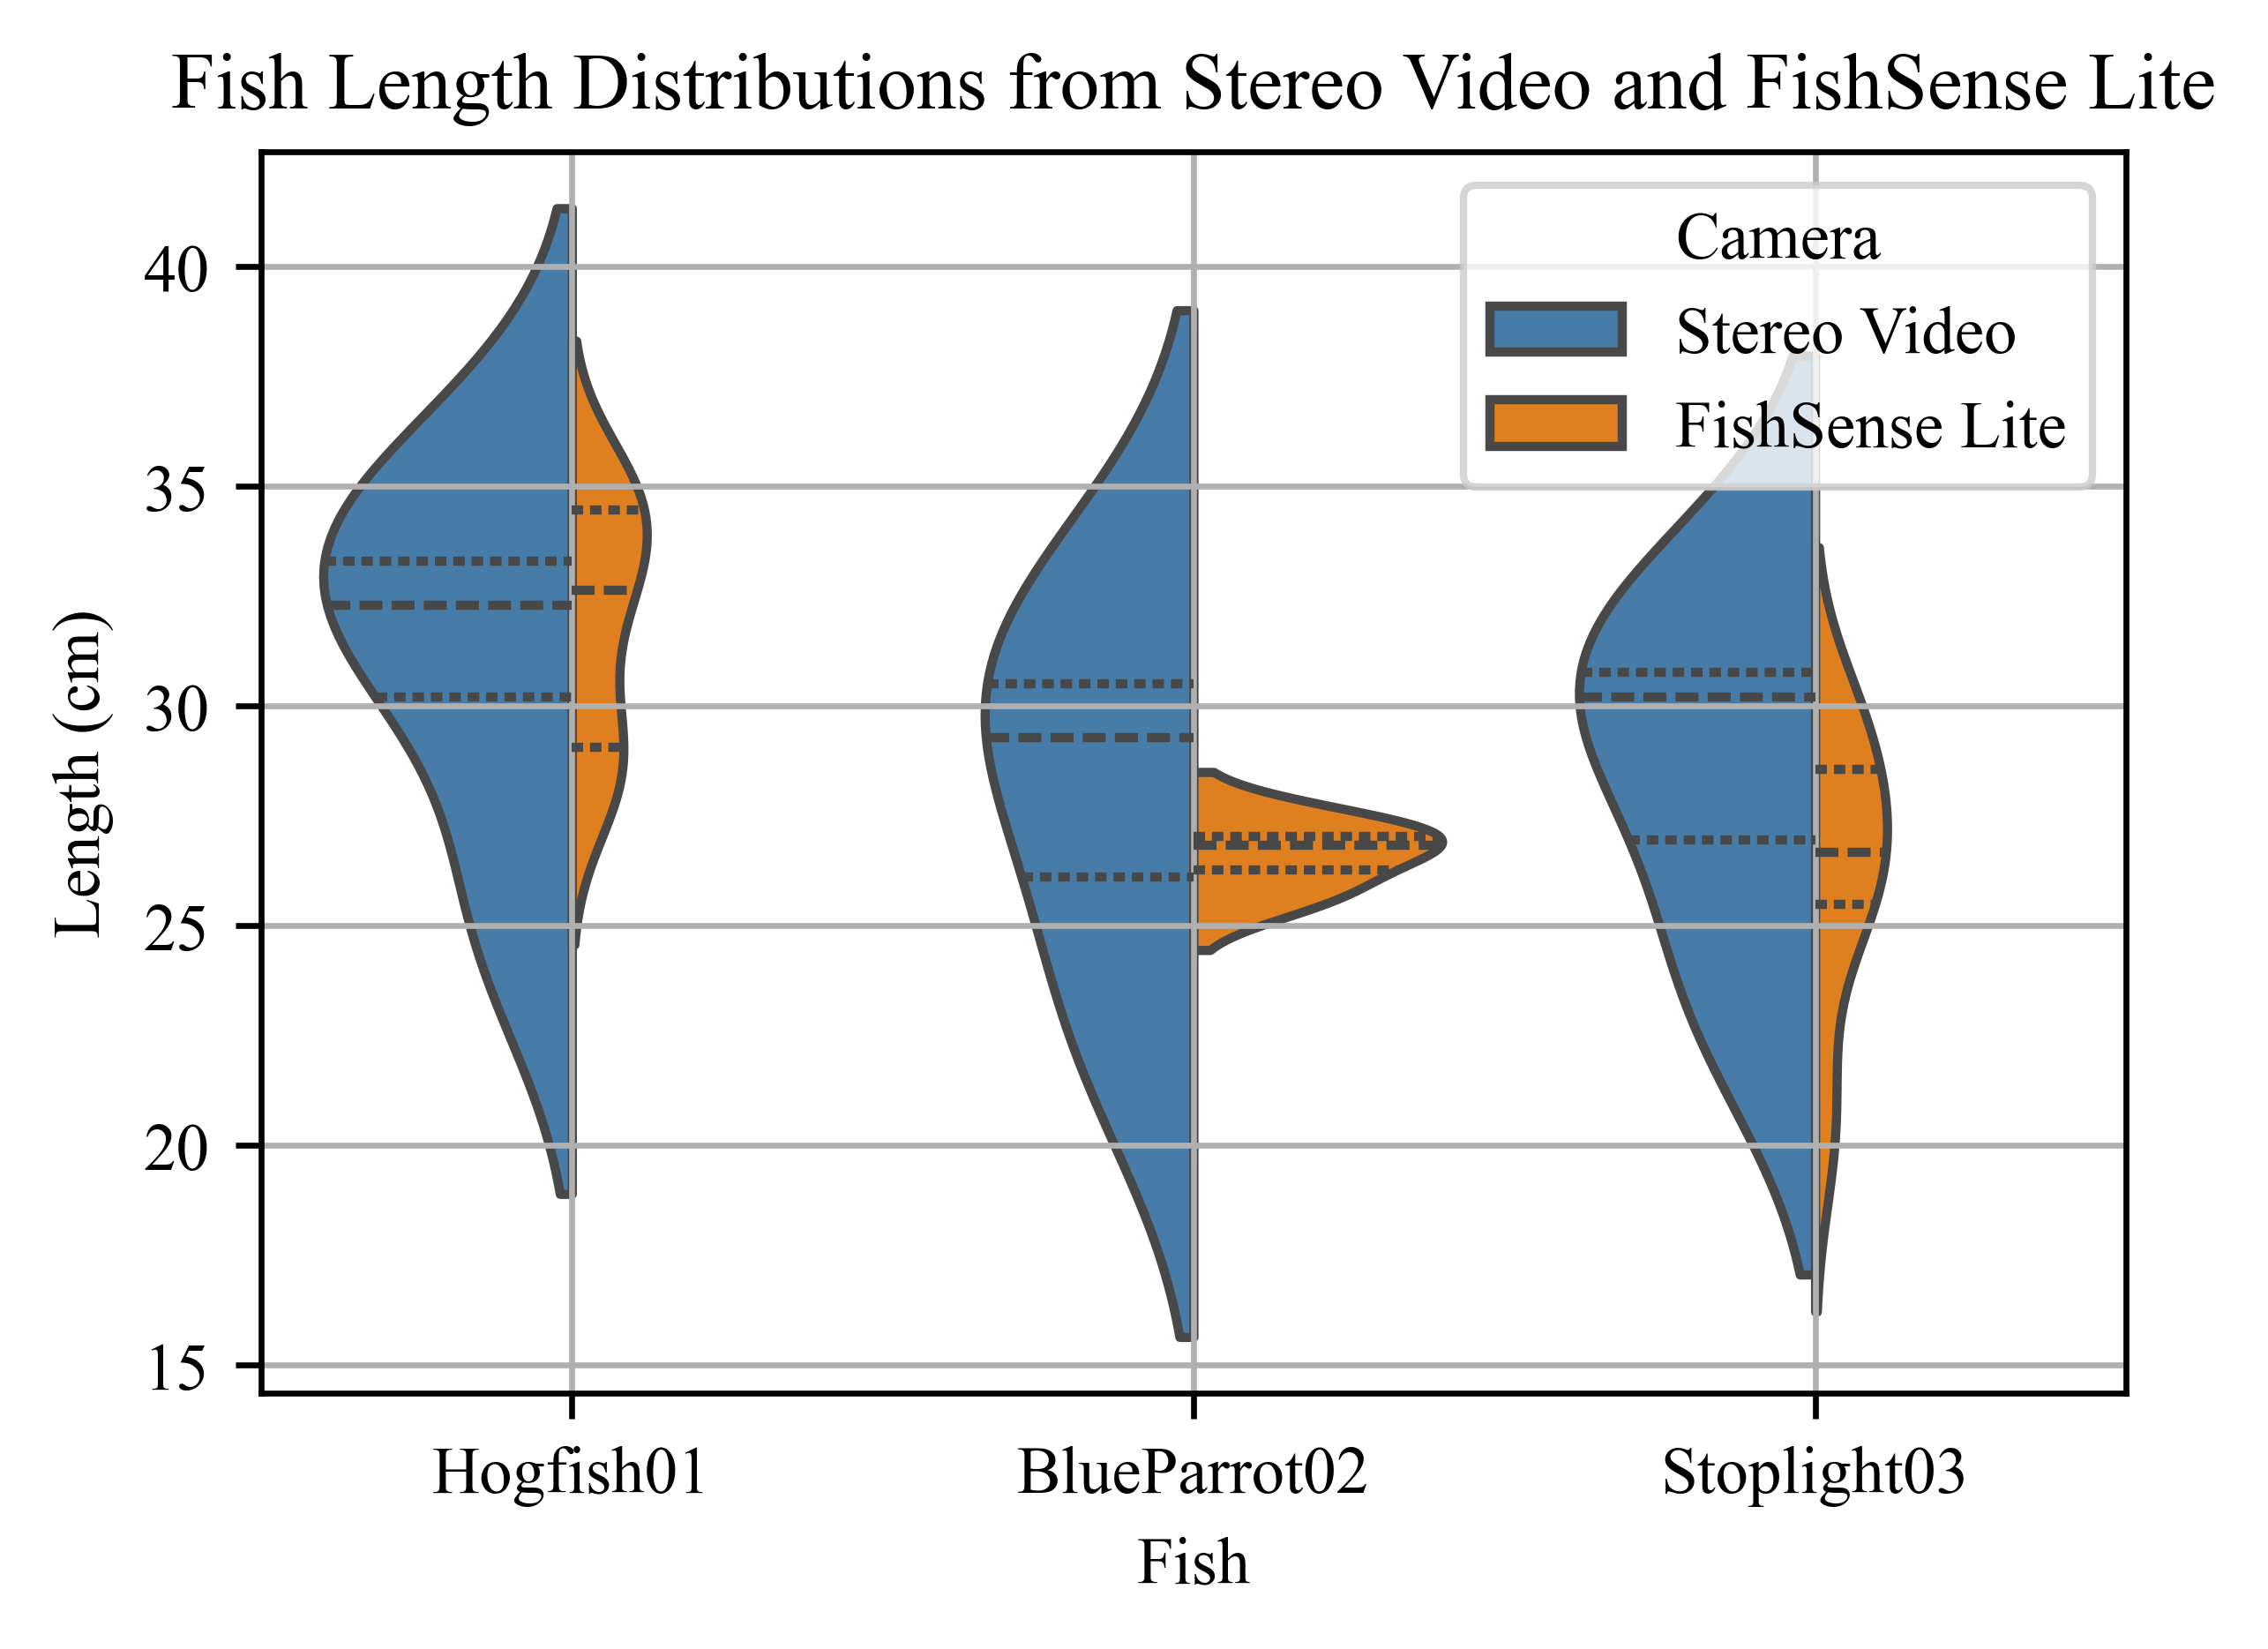

In [6]:
fig = plt.figure(layout='compressed')
ax = fig.add_subplot(111)
sns.violinplot(data=sv_fsl_df, x="Fish", y="Length (cm)", hue="Camera", split=True, inner="quart", ax=ax)
ax.set_title("Fish Length Distributions from Stereo Video and FishSense Lite")
ax.grid()

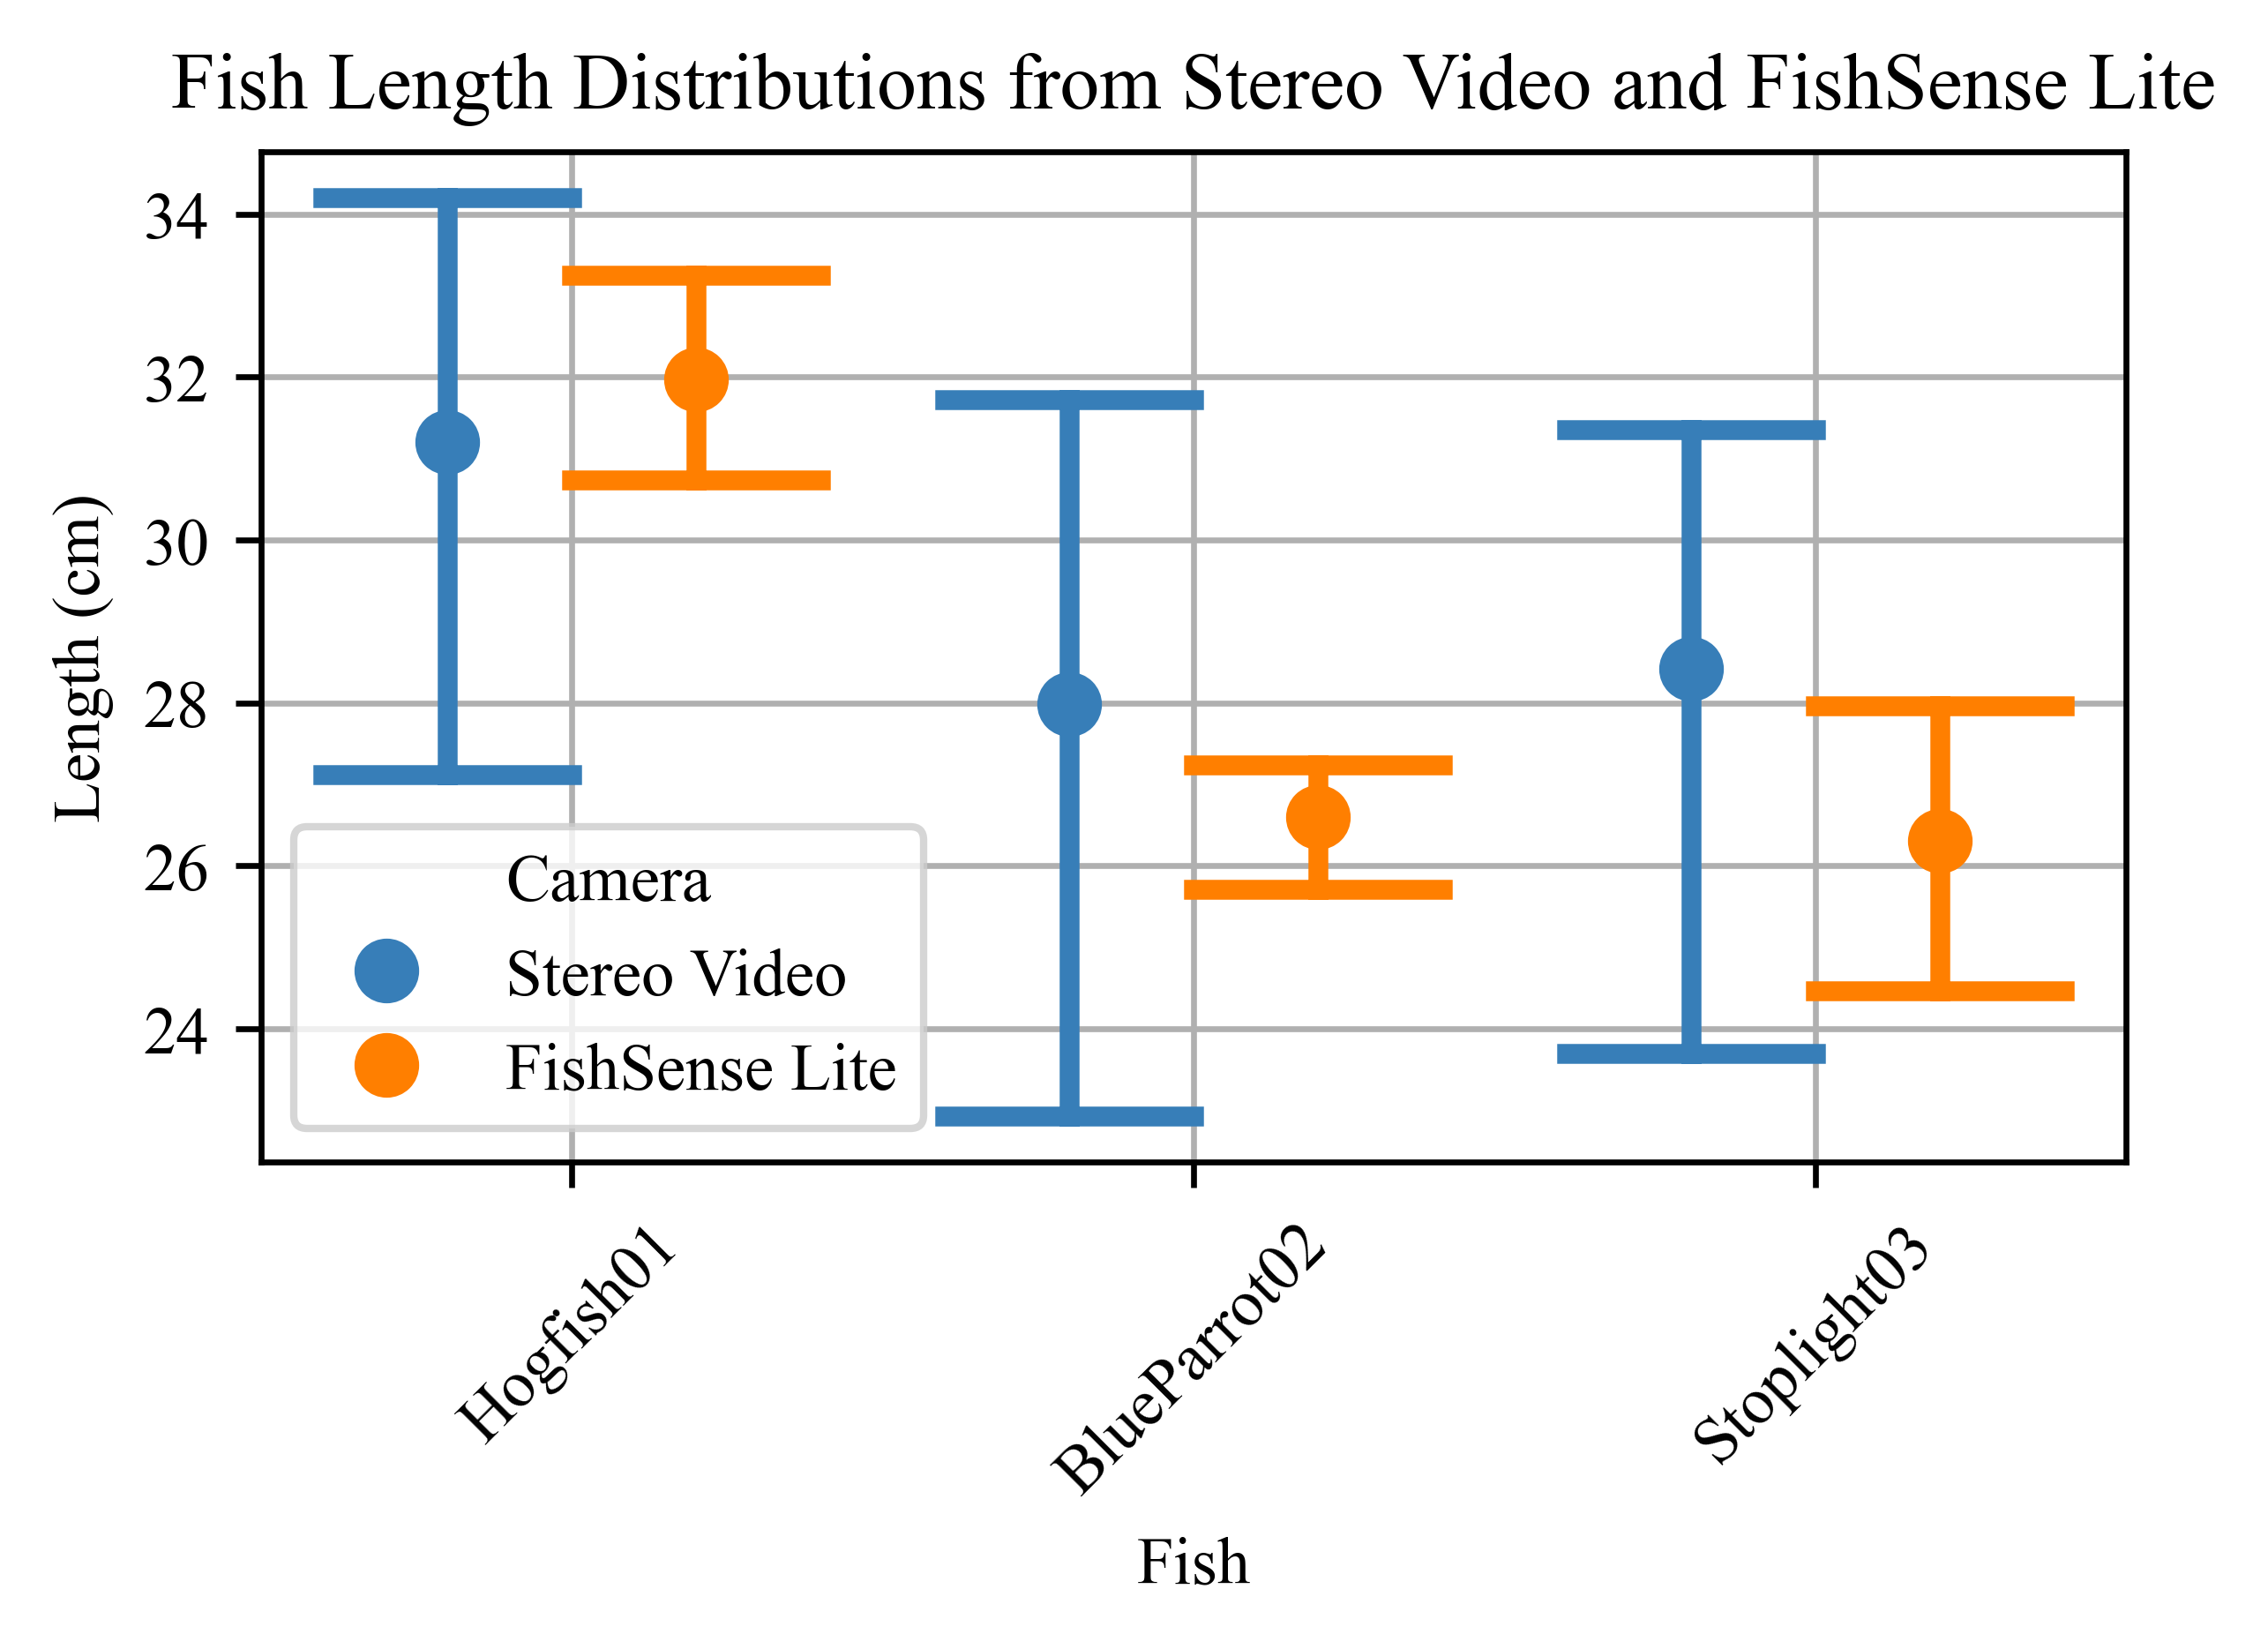

In [7]:
fig = plt.figure(layout='compressed')
ax = fig.add_subplot(111)
sns.pointplot(data=sv_fsl_df, x="Fish", y="Length (cm)", hue="Camera", linestyle="none", capsize=.4, dodge=.4, ax=ax)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title("Fish Length Distributions from Stereo Video and FishSense Lite")
ax.grid()